# TP de mise en œuvre d'algorithmes à base de graph-cuts pour le traitement de l'image - Théo Rouvet et Wassim Lakehal


## 1. Classification binaire d'une image bruitée

### 1.1 Analyse des distributions des 2 classes de l'image 

D'après le TP précédent, les distributions des deux classes de l'image sont des gaussiennes :
* La classe 0 a pour moyenne $97$ et pour variance $502$
* La classe 1 a pour moyenne $164$ et pour variance $507$

### 1.2 Modèle d'Ising pour la régularisation

On fait l'hypothèse, comme au TP précédent, que les **variances des deux classes sont égales** : $ \sigma^2_0 = \sigma^2_1 $.


**L'énergie d'attache aux données** s'écrit :

$$U_{\text{att do}} = \sum_s -ln(\mathbb{P}(Y_s = y_s | X_s = x_s)) = \frac{1}{2\sigma^2} \sum_s (y_s - \mu_{x_s})^2 + \frac{|s|}{2} ln(2\pi\sigma^2) $$ 

en utilisant le fait qu'on ait des distributions gaussiennes.

On écrit ensuite le **potentiel pour les cliques d'ordre 2** : pour tout couple de sites voisins $(s,t)$ en $4$-connexité, on a le potentiel $U_c(x_s,x_t) = \beta \mathbb{1}_{x_s \neq x_t}$. En travaillant sur tout l'image, on a ainsi : 

$$ V_c = \sum_{(s,t) \text{ voisins}} U_c(x_s, x_t) = \beta \sum_{(s,t) \text{ voisins}} \mathbb{1}_{x_s \neq x_t}$$


On en déduit **l'énergie a posteriori globale** en rassemblant les deux termes définis précédemment :

$$ U_{\text{globale}} = U_{\text{att do}} + V_c = \frac{1}{2\sigma^2} \sum_s (y_s - \mu_{x_s})^2 + \frac{|s|}{2} ln(2\pi\sigma^2) + \beta \sum_{(s,t) \text{ voisins}} \mathbb{1}_{x_s \neq x_t} $$

On en déduit également **l'énergie locale associée** : 

$$ U_{\text{locale}}(x_s|y_s) = \frac{1}{2\sigma^2}(y_s - \mu_{x_s})^2 + \frac{1}{2}ln(2\pi\sigma^2) + \beta \sum_{t \text{ voisin de } s} \mathbb{1}_{x_s \neq x_t} $$

La somme définie dans le terme d'énegie locale contient 4 termes en 4-connexité (les voisins du site $s$).


Pour minimiser $ U_{\text{globale}} $ : 
* Si $\beta = 0$, **minimiser l'énergie globale revient à minimiser le terme d'attache aux données** (le terme de régularisation est nul). Le TP précédent a montré que cela revenait à **seuiller l'image** avec un seuil optimal.
* Si $\beta = +\infty$, on cherche à **interdire les transitions** en rendant leur coût infini. La solution minimisant l'énergie globale est donc une **image uniforme et homogène** (noire ou blanche unie).

Lorsque $\beta$ augmente, on accorde plus d'importance au terme de régularisation, ce qui permet de limiter l'impact du bruit impulsionnel lié au seuillage. Néanmoins, augmenter trop ce terme peut résulter en un trop grand lissage de l'image et par conséquent une perte de détails. **Il y a donc un compromis à chercher sur la valeur de $\beta$**.

### 1.3 Optimisation par ICM

Étant donné que nous n'avons pas programmé le recuit simulé, nous traitons cette partie avec l'algorithme ICM. On effectue 10 itérations avec $\beta_{reg} = \frac{2000}{\sigma^2} = 4$ : 
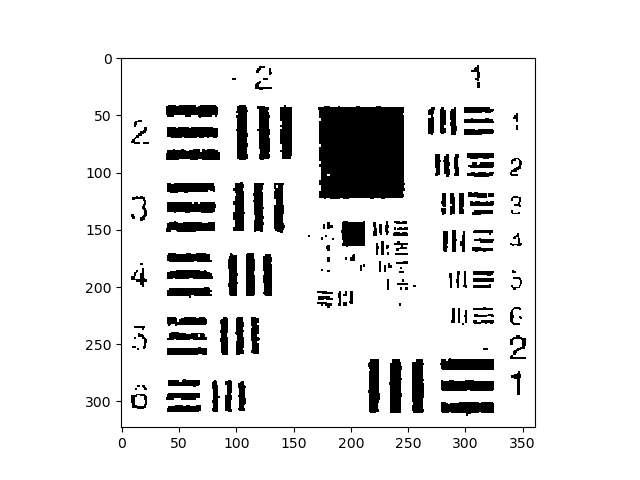


### 1.4 Optimisation par recherche de coupure minimale 

Le graphe pour la recherche de coupure minimale est tel que ci-dessous : 

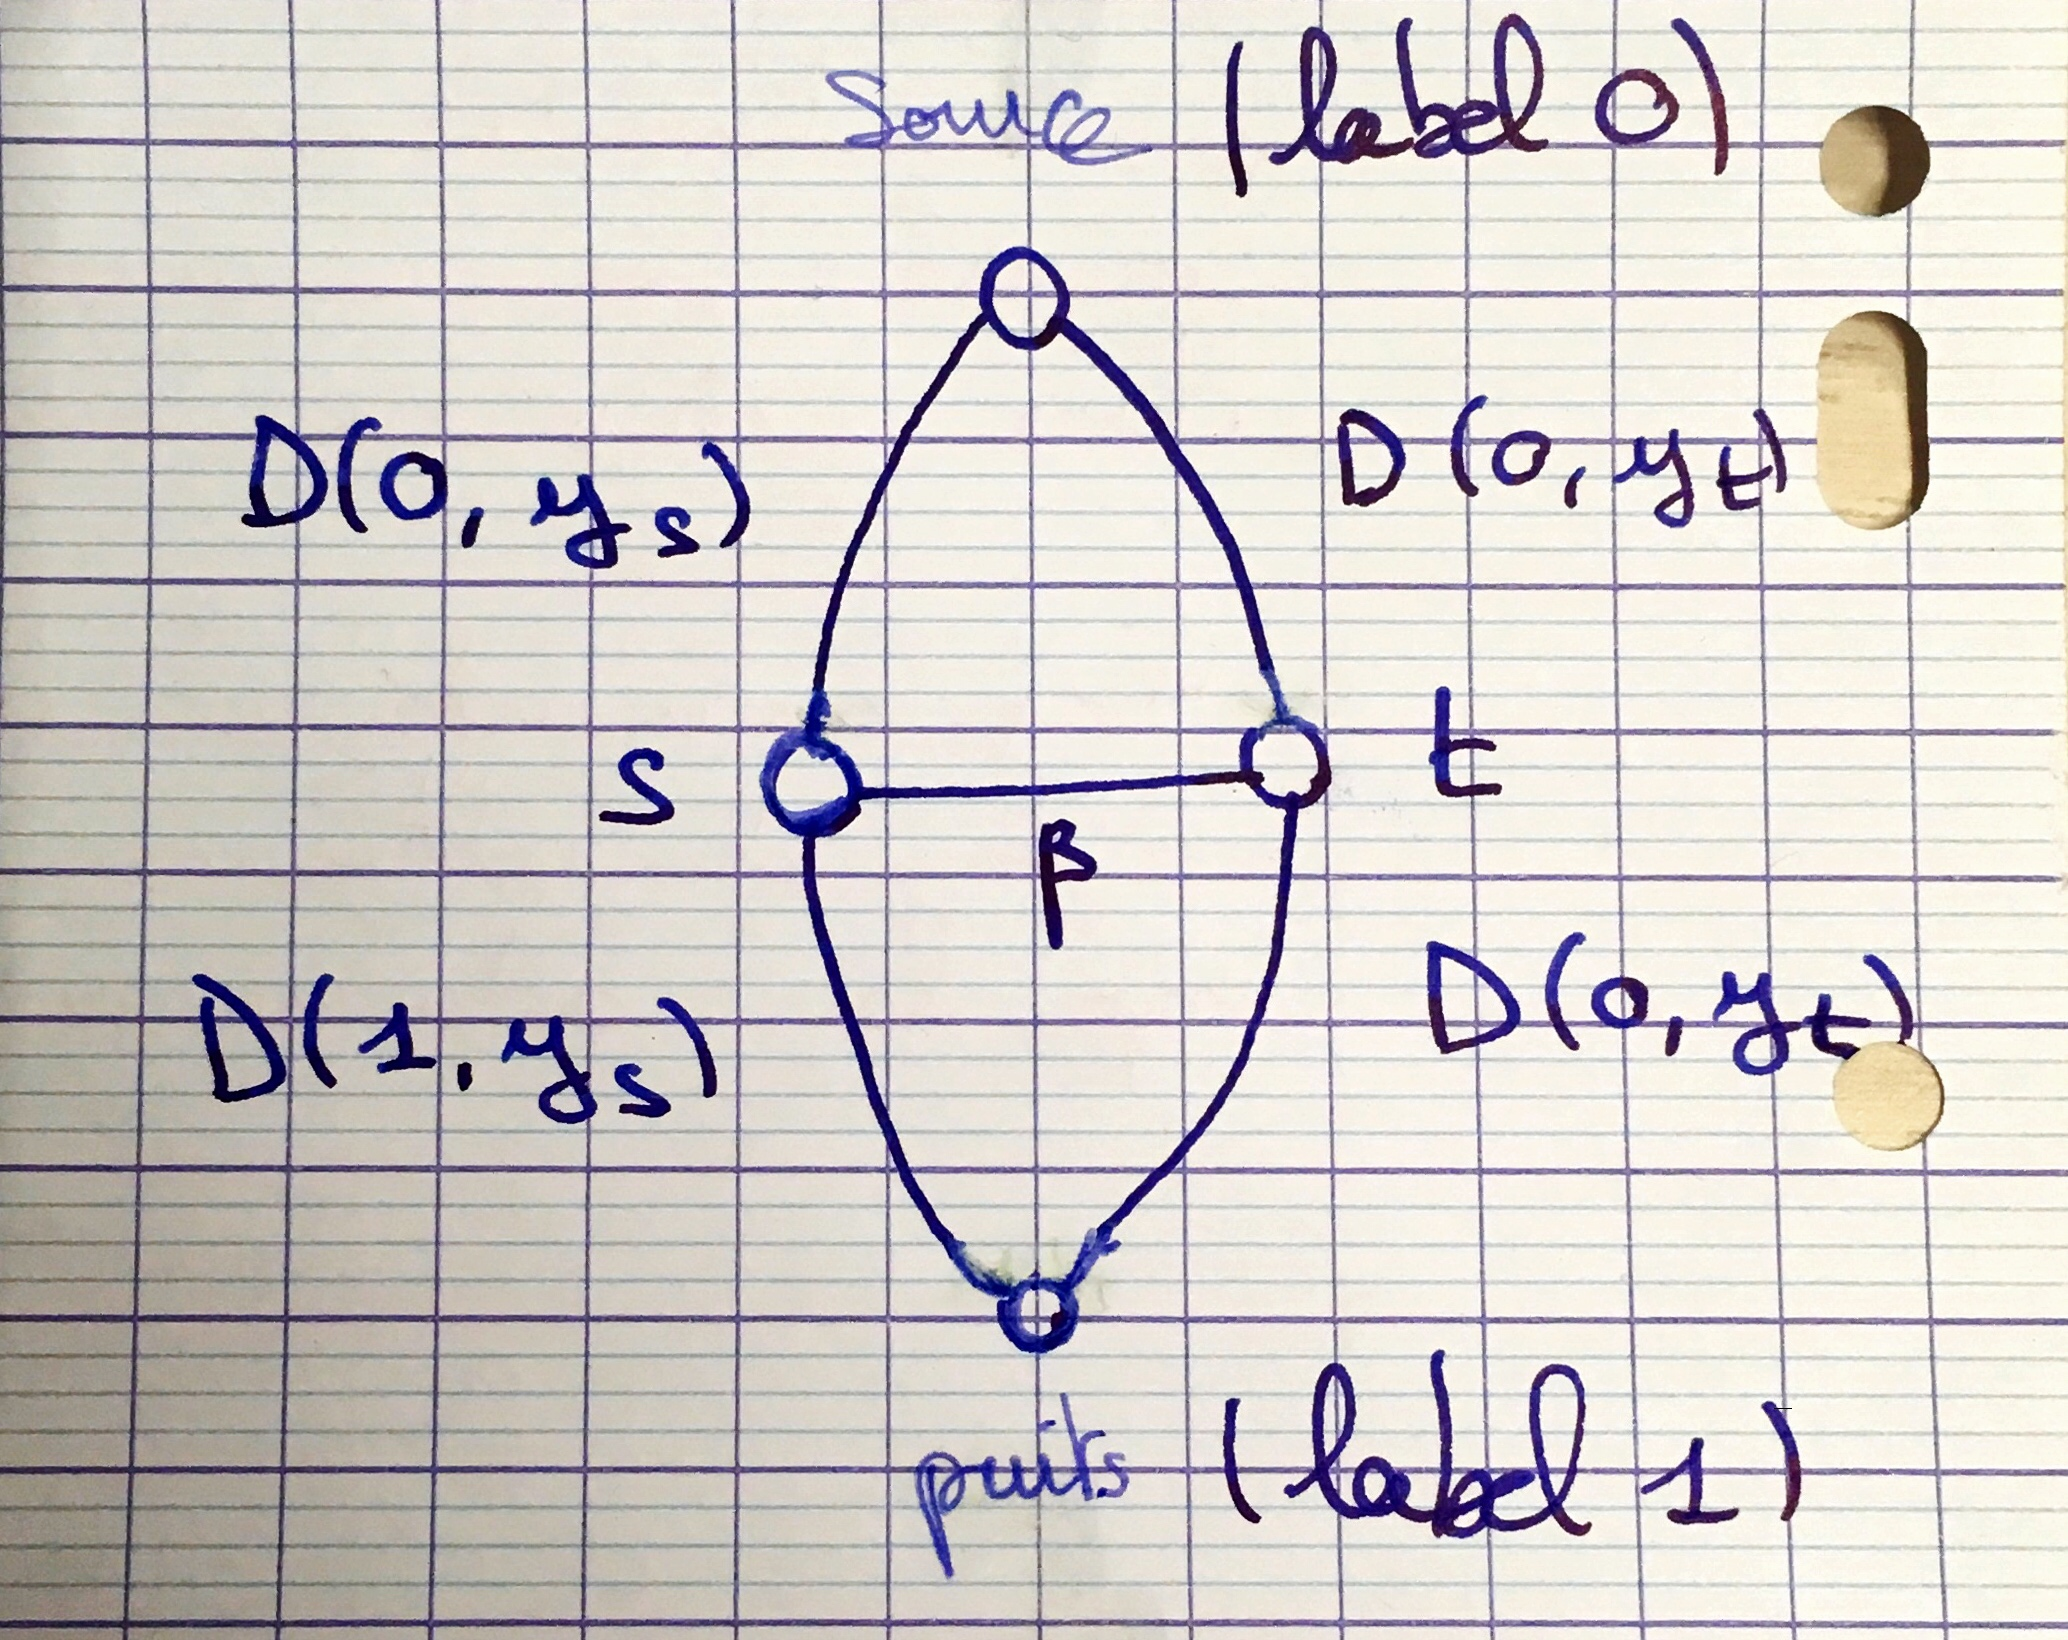

Après exécution de l'algorithme ``tp_grcut_bin``, on obtient le résultat suivant :

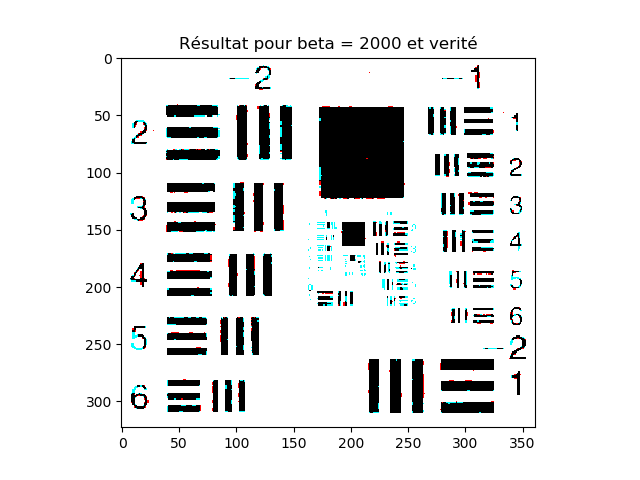

Pour les grandes zones homogènes, le résultat est très satisfaisant. Toutefois, pour les petites zones avec de grandes variations (comme au centre de l'image), il y a plus de différences entre l'image originale et l'image débruitée par graph-cut.

Après exécution du programme ``tp_grcut_bin_beta``, on obtient la courbe suivante :

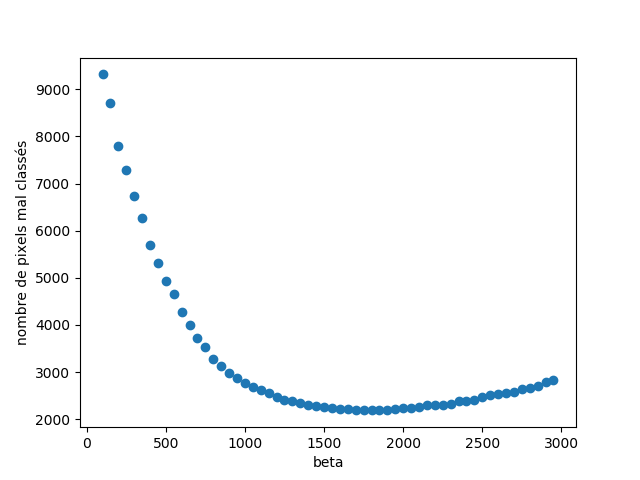

Ainsi, on trouve $\beta_{\text{optimal}} = 1750$. On avait trouvé $2000 = 4\sigma^2$ avant, soit un écart relatif de 12.5%.



Voici l'image par ICM puis par graph-cut pour $\beta = \beta_{optimal} = 1750$ : 

Pour l'ICM, on obtient une erreur relative de $2,27\%$ :
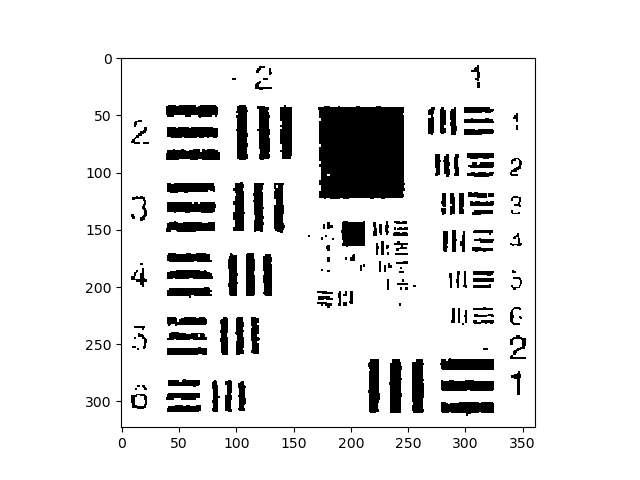

Pour le graph-cut, on obtient une erreur relative de $1,88\%$ :
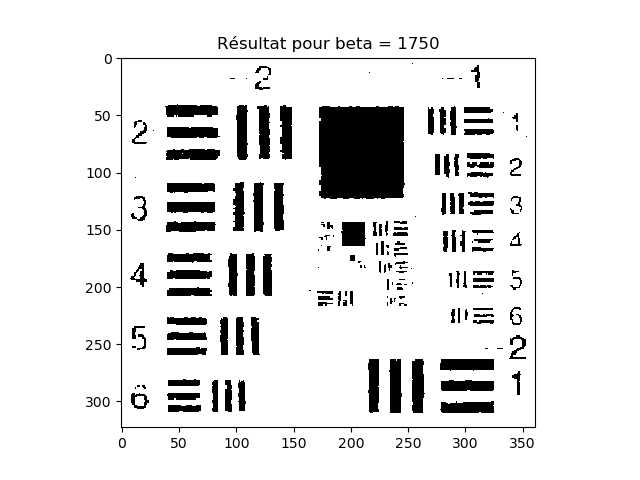

Il est difficile de comparer ces deux résultats ici car l'ICM est mieux dans certaines zones (notamment le centre) et le graph-cut est mieux dans la représentation des chiffres. Quantitativement, le graph-cut est optimal en terme d'erreur. 

On a de plus, pour $\beta = 17500 >> \beta_{optimal}$ :

Pour l'ICM, on obtient une erreur relative de $2,27\%$ :
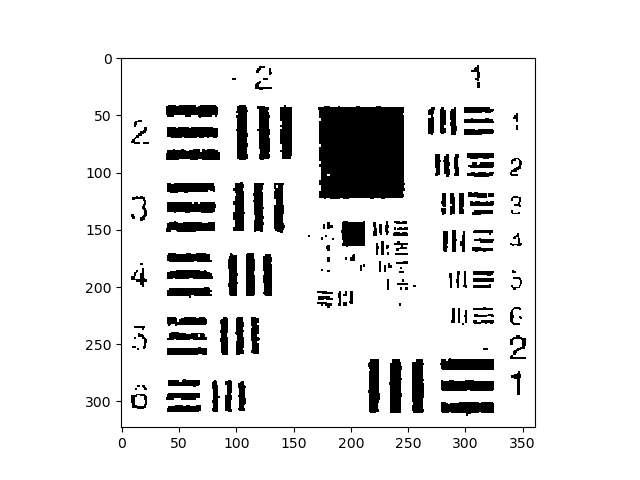

Pour le graph-cut, on obtient une erreur relative de $14,02\%$ :
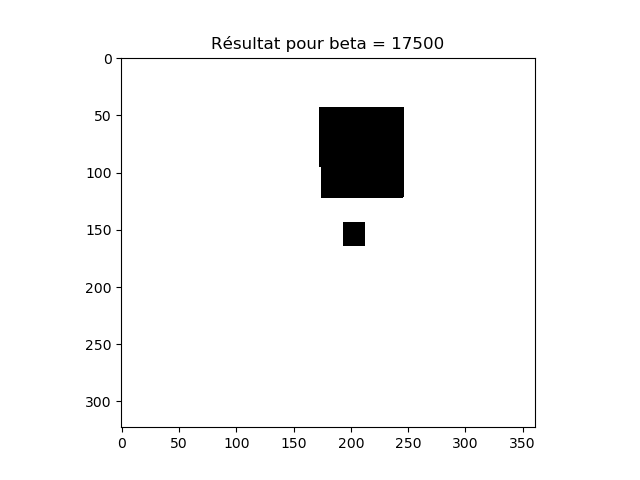

Ici, on a très clairement l'ICM qui fournit un meilleur résultat que le graph-cut.

**L'objectif du graph-cut est de minimiser l'énergie mais pas forcément l'erreur, là où le recuit simulé et l'ICM cherchent à minimiser l'erreur et non pas l'énergie**. Ainsi, le taux d'erreurs avec l'image vraie peut être plus faible avec le résultat du récuit simulé et l'ICM qu'avec l'optimisation par graph-cut.

Cela n'est pas toujours vérifié, par exemple ici le modèle du graphe est cohérent avec la forme de l'image donc le taux d'erreur est légèrement meilleur lorsque $\beta = 1750$.

### 1.5 Classification d'une image couleur

Après avoir complété le programme et cherché le $\beta_{\text{optimal}}$ (qui est égal à $3800$), on obtient l'étiquetage suivant :

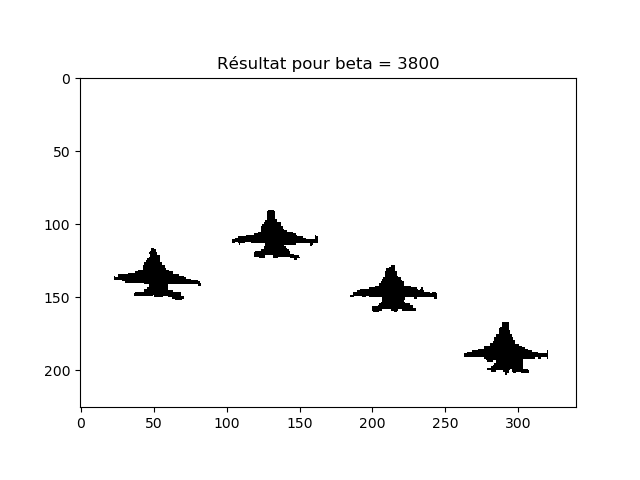

Nous avons procédé comme suit :
* Pour la modélisation, on a pris une zone homogène d'avion et du ciel et on a relevé dans chaque zone la moyenne du niveau de gris de chaque canal
* En s'inspirant du cas du niveau de gris, on a défini le terme d'attache aux données comme la moyenne des trois termes d'attache aux données canal par canal
* On a procédé par dichotomie "empirique" pour trouver un $\beta_{\text{optimal}}$ égal à $3800$
* On exécute le programme qui cherche un étiquetage qui minimise l'énergie par coupure de graphe, ce qui nous donne l'image ci-dessus. 

## 2 Débruitage d'une image à niveaux de gris

Pour un bruit suivant un distribution gaussienne, on a :
$$U_{\text{attache aux données}} = \sum_{p \in S} - log(p(y_p|x_p)) = \sum_{p \in S} ( \frac{1}{2} log(2\pi\sigma^2) + \frac{(y_p-x_p)^2}{2\sigma^2} )$$


Et, pour un bruit suivant une distribution de Rayleigh :
$$U_{\text{attache aux données}} = \sum_{p \in S} - log(p(y_p|x_p)) = \sum_{p \in S}(2log(x_p) - log(2y_p) + \frac{y_p^2}{x_p^2})$$

Pour l'image ``Ibruitee``, en observant la distribution de l'image dans les zones homogènes claires et les zones homogènes sombres, on observe deux gaussiennes :
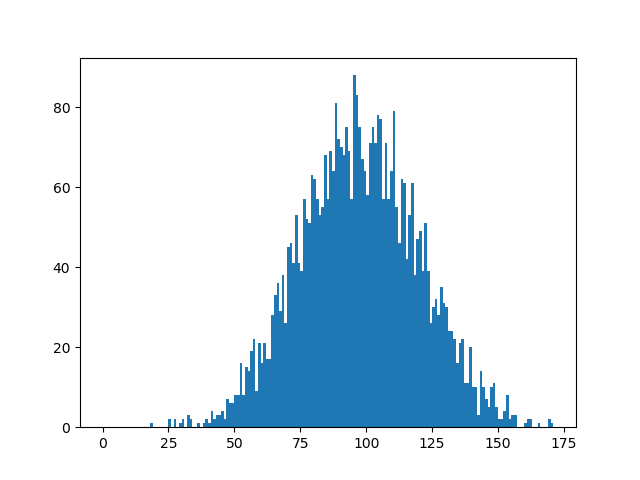
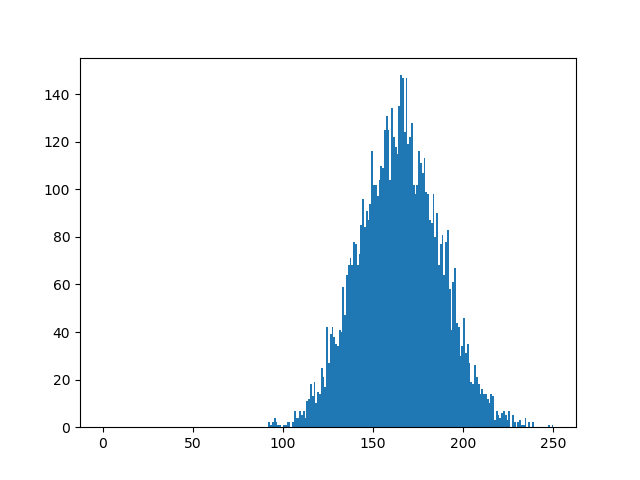

En utilisant le même procédé, on observe deux distributions de Rayleigh pour l'image ̀``Ibruitee2``, ce qui confirme la nature du bruit pour chacune des images.

Les trois modèles sont semi-métriques. En effet, pour tous $x_p, x_q$, on a :

* $ \delta_{x_p = x_q} = \delta_{x_q = x_p} = 0 \text{ ou } 1 \geq 0$ 
* $ |x_p - x_q | = |x_q - x_p | \geq 0$
* $ (x_p - x_q)^2 = (x_q - x_p)^2 \geq 0$

Par ailleurs, 

* Si $\delta_{x_p = x_q} = 0$ alors $x_p = x_q$
* Si $|x_p - x_q | = 0$ alors $x_p = x_q$
* Si $(x_p - x_q)^2 = 0$ alors $x_p = x_q$

Ces trois modèles sont bien semi-métriques.

Regardons lesquels forment des métriques :

* $\delta_{x_p = x_t} + \delta_{x_t = x_q} \left\{
    \begin{array}{ll}
        \geq 1 & \mbox{si } x_p \neq x_t \text{ ou } x_t \neq x_q\\
        = 0 & \mbox{sinon.}
    \end{array}
\right.$
Or, si $\delta_{x_p = x_q} = 1$, on a $x_p \neq x_q$ donc $x_t \neq x_p$ ou $x_t \neq x_q$. 
D'où, quel que soit le cas, $\delta_{x_p = x_q} \leq \delta_{x_p = x_t} + \delta_{x_t = x_q}$

* $|x_p - x_q | \leq |x_p - x_t | + |x_t - x_q | $ par inégalité triangulaire

* En revanche, le modèle quadratique n'est pas une métrique car $(2 - 0)^2 = 4$ mais $(2-1)^2 + (1-0)^2 = 2 \leq 4$ 

Ainsi, **les modèles de Potts et de variation totale sont des métriques et le modèle quadratique n'est que semi-métrique**.

### 2.1.Débruitage dans le cas du bruit gaussien

On effectue, sur l'image ``I_bruitee``, une $\alpha$-expansion pour la régularisation via le modèle de Potts et de variation totale ainsi qu'une $\alpha$-$\beta$-swap pour la régularisation via le modèle quadratique (dans la lignée de ce qu'on a prouvé à la question précédente).

Pour la variation totale avec un poids de régularisation $\beta = 60$ :
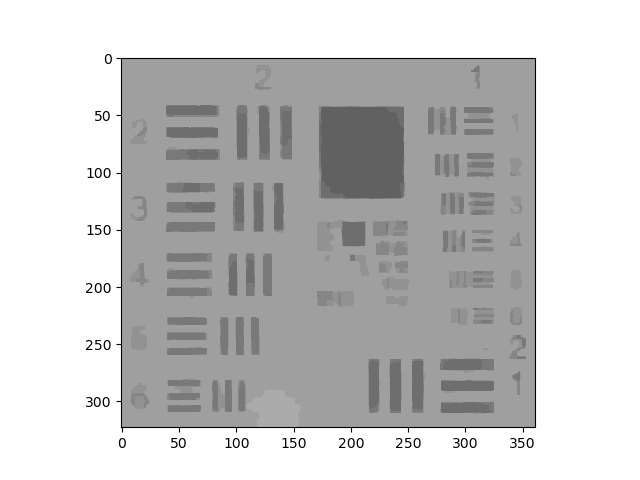

Pour le modèle de Potts avec un poids de régularisation $\beta = 1000$ : 
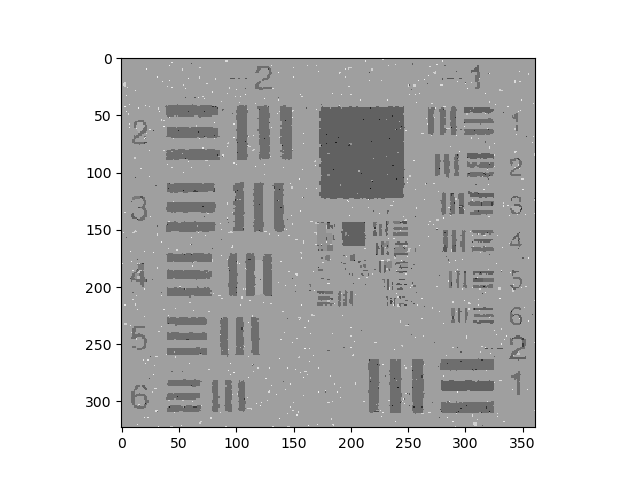

Pour le modèle quadratique avec un poids $\beta = 4$ :
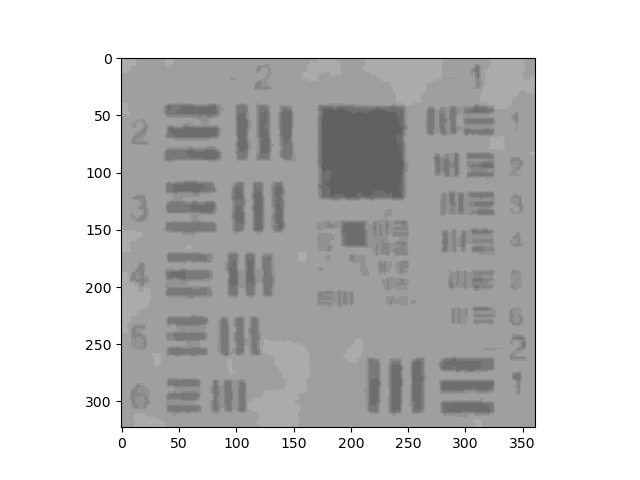

Le modèle de Potts donne une image "cartoonesque" avec un léger bruit impulsionnel. Le modèle quadratique renvoie une image floue.

On trouve alors, par comparaison, que la variation totale fournit un résultat bien plus subtil.

Les valeurs trouvées ci-dessus fournissent le meilleur paramètre de régularisation (trouvé par dichotomie "empirique"). La description de chaque modèle est aussi donnée au-dessus.

Avec le modèle TV on trouve $\beta_{opt} = 40$ :
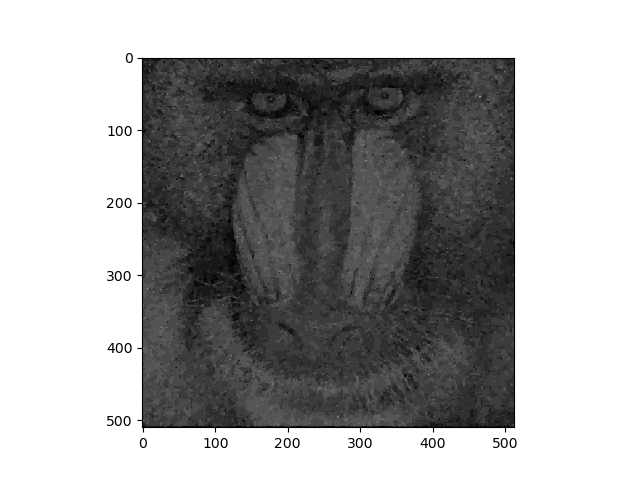

Le modèle de Potts, on trouve $\beta_{opt} = 1300$ :
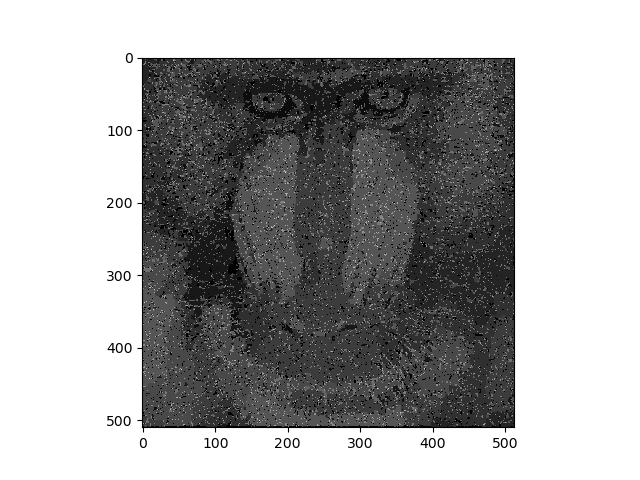

Enfin le modèle quadratique, on trouve $\beta_{opt} = 2$ :
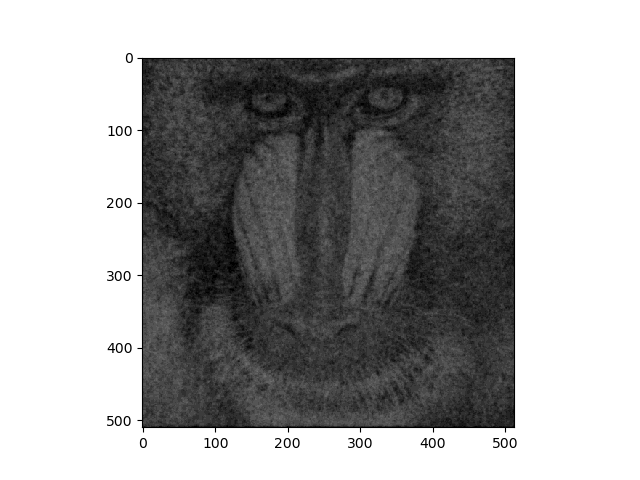

Le modèle quadratique semble plus adapté aux textures que le modèle TV. 

Le modèle de Potts fournit le pire résultat. En effet, il taite de la même manière la texture et le bruit (sa formule n'est pas relative).

### 2.2 Débruitage dans le cas du bruit de speckle

On effectue, sur l'image ``Ibruitee2``, une $\alpha$-expansion pour la régularisation via le modèle de Potts et de variation totale ainsi qu'une $\alpha$-$\beta$-swap pour la régularisation via le modèle quadratique.

Pour la variation totale avec un poids de régularisation $\beta = 0.02$ :
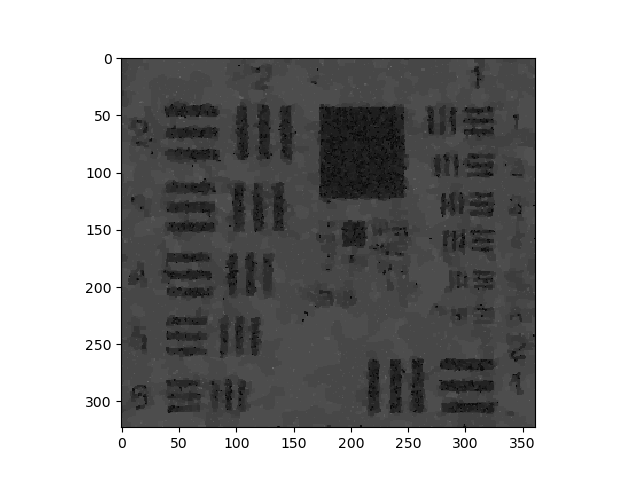

Pour le modèle de Potts avec un poids de régularisation $\beta = 1$ : 
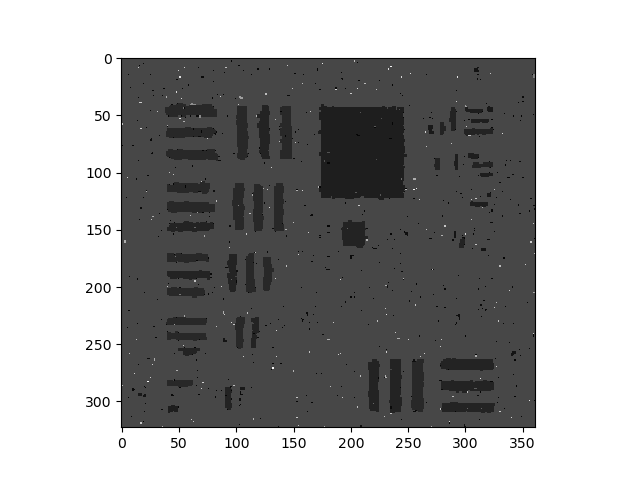

Pour le modèle quadratique avec un poids $\beta = 0.002$ :
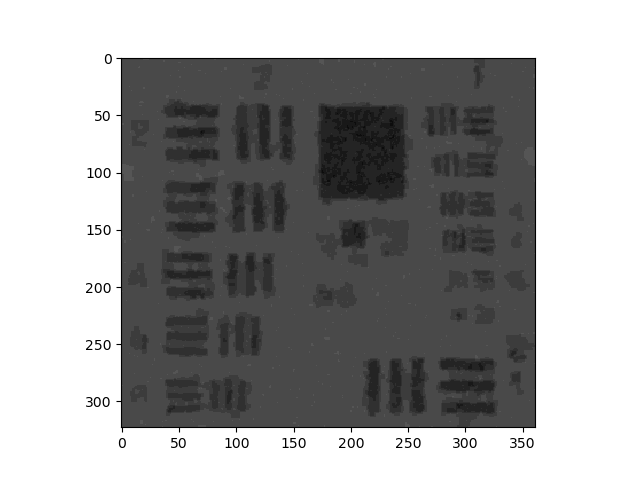

Même conclusion qu'avant : 

Le modèle de Potts donne une image "cartoonesque" avec un léger bruit impulsionnel. Le modèle quadratique renvoie une image floue.

On trouve alors, par comparaison, que la variation totale fournit un résultat bien plus subtil.

Les valeurs trouvées ci-dessus fournissent le meilleur paramètre de régularisation (trouvé par dichotomie "empirique"). La description de chaque modèle est aussi donnée au-dessus.

Avec le modèle TV on trouve $\beta_{opt} = 0.006$ :
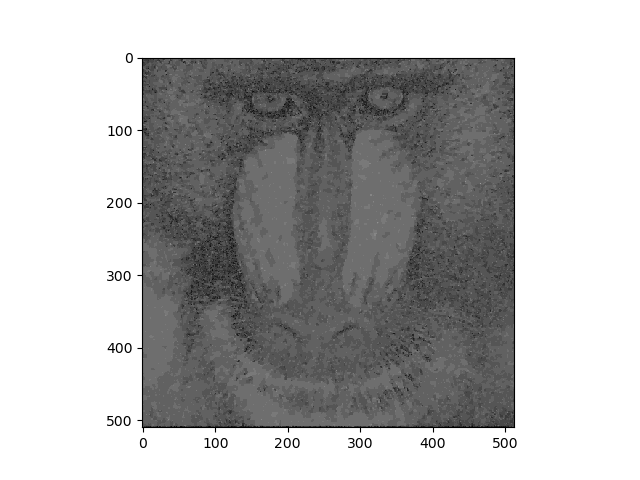

Le modèle de Potts, on trouve $\beta_{opt} = 0.15$ :
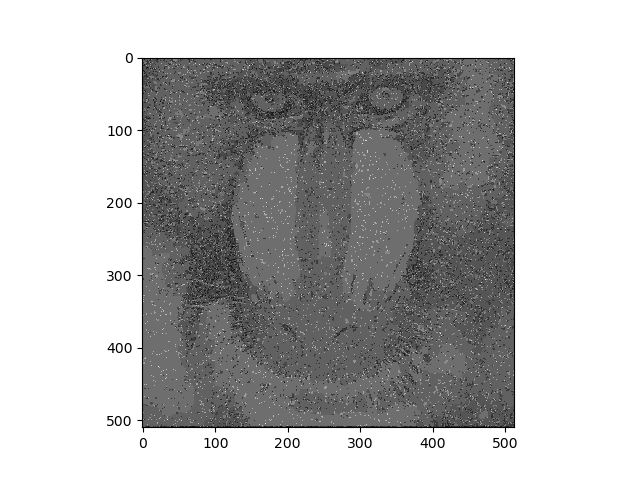

Enfin le modèle quadratique, on trouve $\beta_{opt} = 0.0005$ :
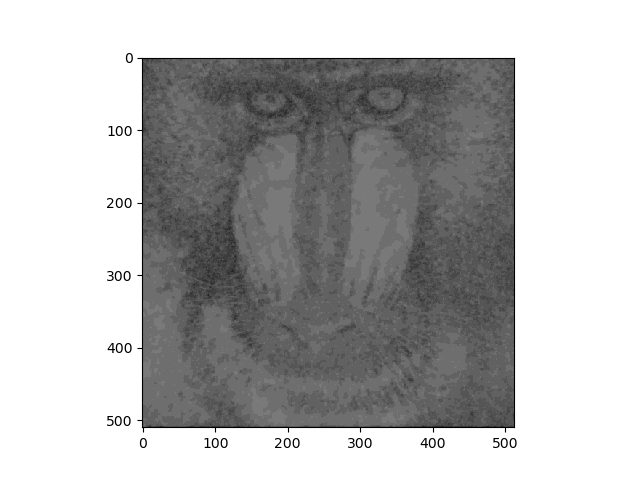

Même conclusion qu'avant : 
Le modèle quadratique semble plus adapté aux textures que le modèle TV. Le modèle de Potts fournit le pire résultat. 